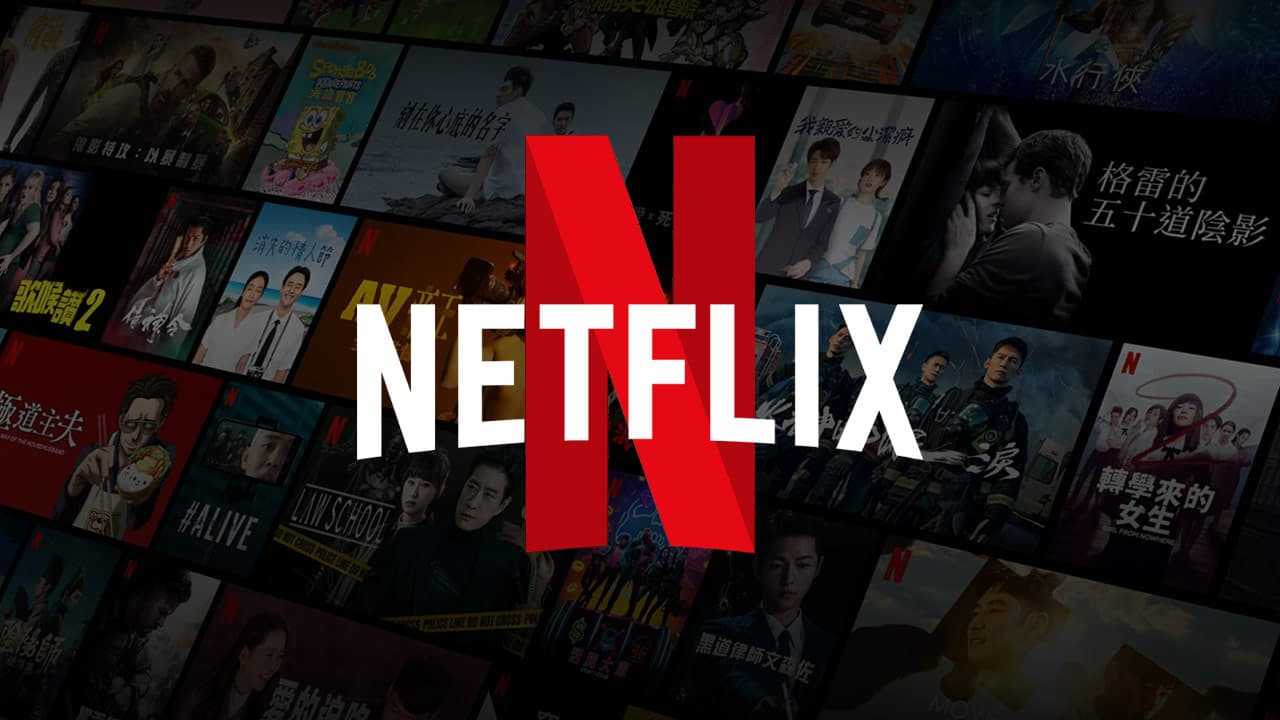

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
df=pd.read_csv("netflix.csv")

In [3]:
df.head() # show first five rows of data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Check the shape of data

In [4]:
df.shape

(8807, 12)

**Observation**
- There is **8807** rows and **12** columns 

## Check the Data type of data

In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**Observation**
- All the columns are object datatype except **release_year**

In [6]:
df.sort_values(by='release_year',ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


In [29]:
df['date_added']=df['date_added'].fillna(method='ffill')


In [30]:
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=pd.DatetimeIndex(df['date_added']).year
df['month_added']=df['date_added'].dt.month

In [31]:
df['year_added']=df['year_added'].astype(int)
df['month_added']=df['month_added'].astype(int)

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Observation**
- Dataset contains **some missing value** 

# Exploratory data analysis (EDA)

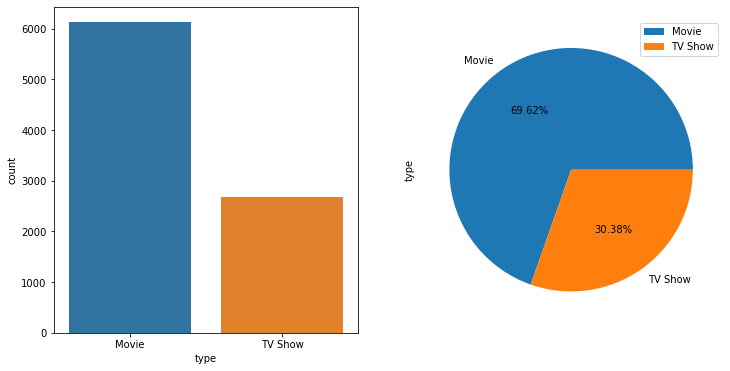

In [33]:

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(data=df,x=df.type)

plt.subplot(1,2,2)
df.type.value_counts().plot(kind='pie',autopct="%1.2f%%")
plt.legend()

In [ ]:
**Observation**
- In dataset about 70% contain movie data
